 PASO 1: Análisis de products.csv

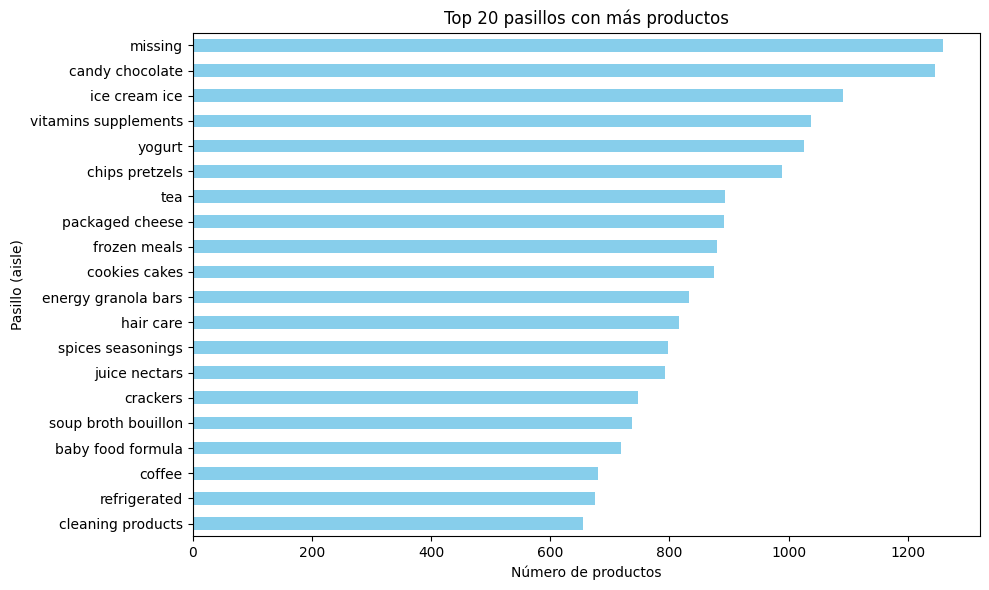

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datasets
products = pd.read_csv("data/products.csv")
aisles = pd.read_csv("data/aisles.csv")

# Unir productos con nombres de pasillos
prod_aisle = products.merge(aisles, on="aisle_id", how="left")

# Agrupar: número de productos por pasillo
aisle_counts = prod_aisle["aisle"].value_counts().head(20)

# Gráfico
plt.figure(figsize=(10, 6))
aisle_counts.sort_values().plot(kind="barh", color="skyblue")
plt.title("Top 20 pasillos con más productos")
plt.xlabel("Número de productos")
plt.ylabel("Pasillo (aisle)")
plt.tight_layout()
plt.show()


PASO 2: ANALISIS ORDERS

Análisis 1: Distribución de pedidos por día de la semana

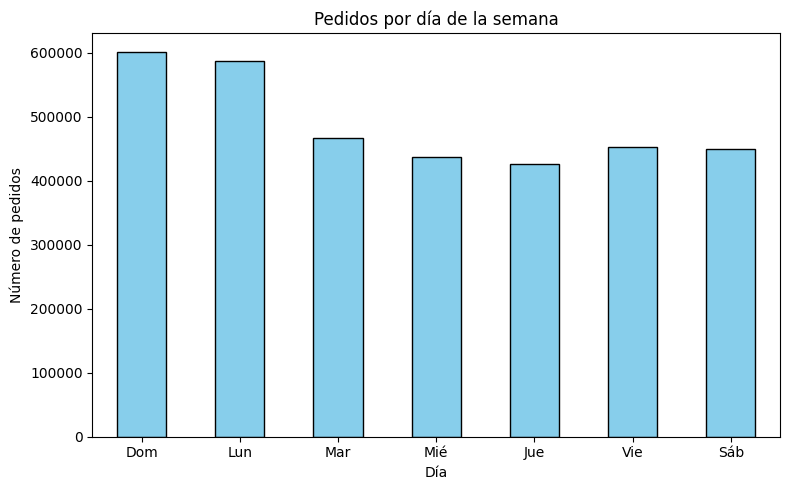

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

orders = pd.read_csv("data/orders.csv")

# Conteo de pedidos por día
dow_counts = orders["order_dow"].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(8, 5))
dow_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xticks(ticks=range(7), labels=["Dom", "Lun", "Mar", "Mié", "Jue", "Vie", "Sáb"], rotation=0)
plt.title("Pedidos por día de la semana")
plt.xlabel("Día")
plt.ylabel("Número de pedidos")
plt.tight_layout()
plt.show()


Análisis 2: Distribución de pedidos por hora (order_hour_of_day)

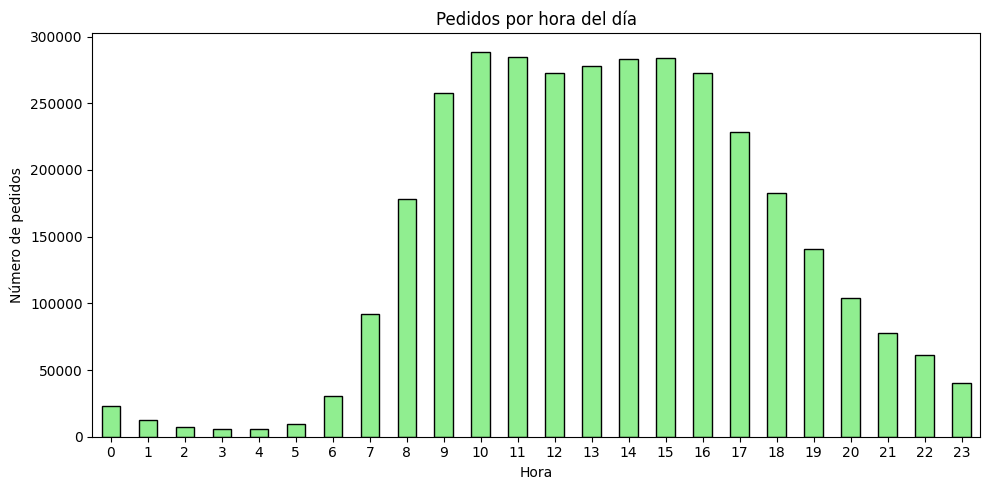

In [3]:
# Distribución de pedidos por hora
hour_counts = orders["order_hour_of_day"].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(10, 5))
hour_counts.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Pedidos por hora del día")
plt.xlabel("Hora")
plt.ylabel("Número de pedidos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Análisis 3: Distribución de días desde el pedido anterior

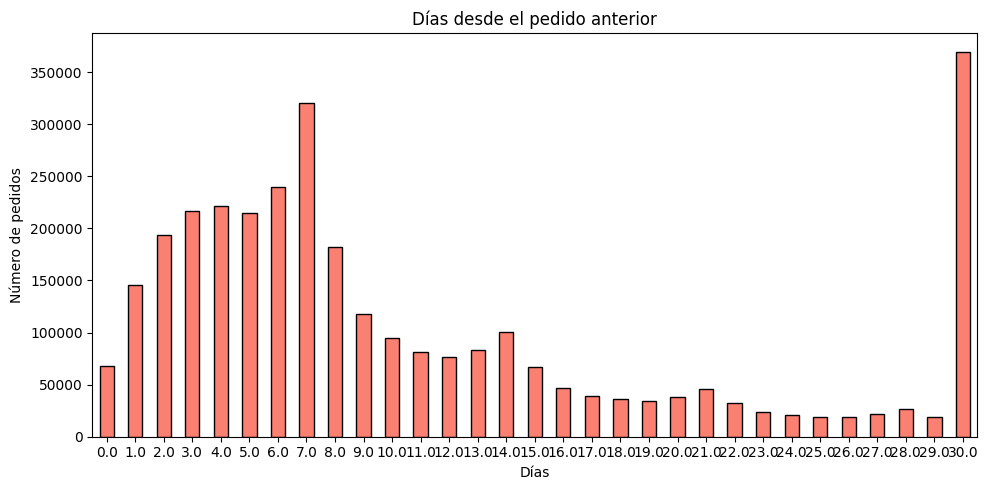

In [4]:
# Filtrar nulos (hay nulos en el primer pedido de cada usuario)
dias = orders["days_since_prior_order"].dropna()

# Gráfico
plt.figure(figsize=(10, 5))
dias.value_counts().sort_index().plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Días desde el pedido anterior")
plt.xlabel("Días")
plt.ylabel("Número de pedidos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Análisis 4: Distribución de número de pedidos por usuario

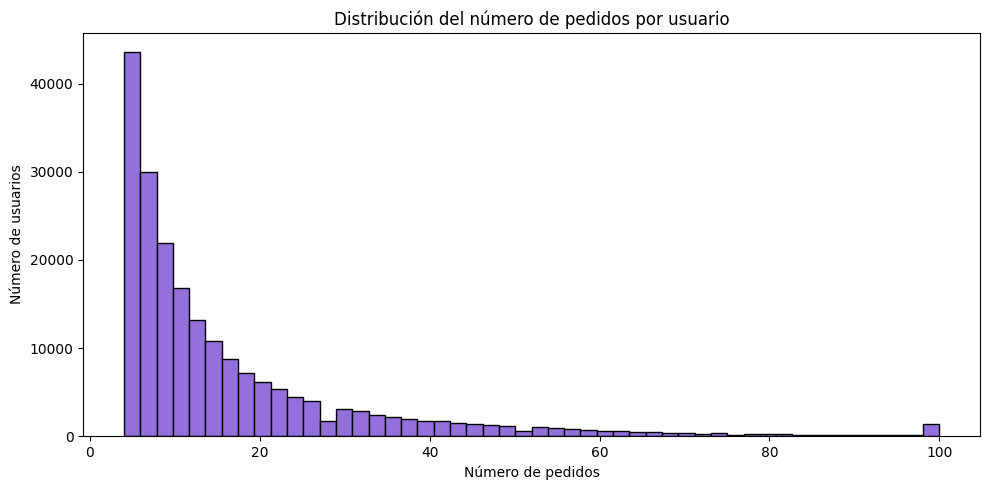

In [5]:
# Contar cuántos pedidos ha hecho cada usuario
pedidos_por_usuario = orders["user_id"].value_counts()

# Gráfico
plt.figure(figsize=(10, 5))
pedidos_por_usuario.plot(kind="hist", bins=50, color="mediumpurple", edgecolor="black")
plt.title("Distribución del número de pedidos por usuario")
plt.xlabel("Número de pedidos")
plt.ylabel("Número de usuarios")
plt.tight_layout()
plt.show()


 PASO 3: Análisis de order_products__prior.csv

Análisis 1: Top 20 productos más comprados

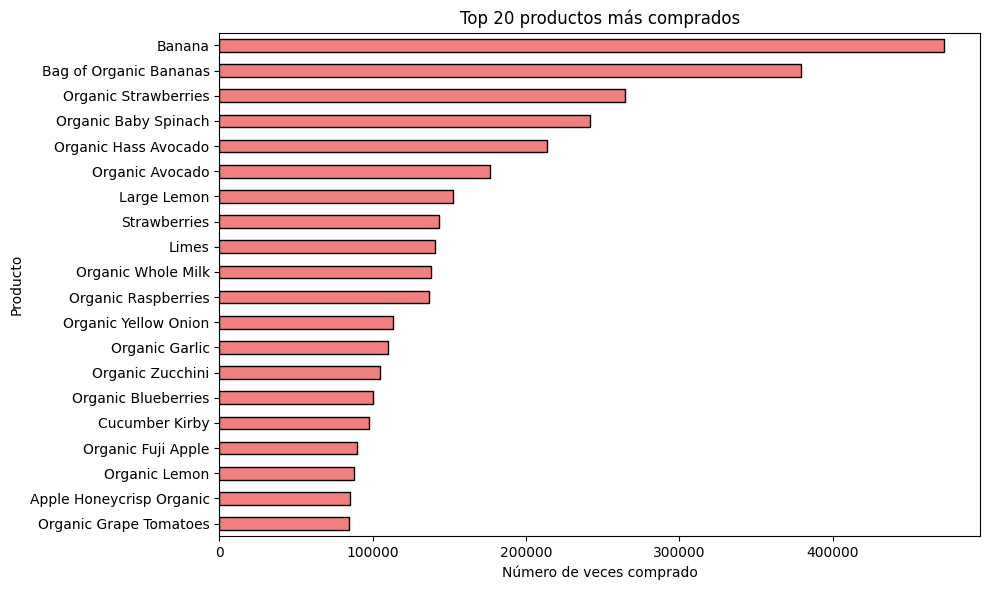

In [6]:
# Cargar datos si no están cargados aún
order_products_prior = pd.read_csv("data/order_products__prior.csv")
products = pd.read_csv("data/products.csv")

# Unir para obtener nombres de productos
merged = order_products_prior.merge(products, on="product_id", how="left")

# Contar productos más comprados
top_products = merged["product_name"].value_counts().head(20)

# Gráfico
plt.figure(figsize=(10, 6))
top_products.sort_values().plot(kind="barh", color="lightcoral", edgecolor="black")
plt.title("Top 20 productos más comprados")
plt.xlabel("Número de veces comprado")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()


 Análisis: Porcentaje de productos reordenados (reordered)

Parte 1: Porcentaje general de productos reordenados

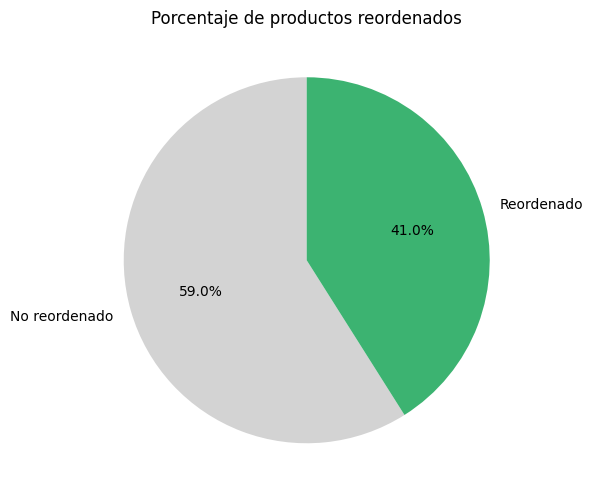

In [7]:
# Porcentaje de productos reordenados vs nuevos
reorder_counts = order_products_prior["reordered"].value_counts(normalize=True) * 100

# Gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(reorder_counts, labels=["No reordenado", "Reordenado"],
        autopct="%1.1f%%", colors=["lightgray", "mediumseagreen"], startangle=90)
plt.title("Porcentaje de productos reordenados")
plt.tight_layout()
plt.show()


Parte 2: Top productos con mayor tasa de reorder

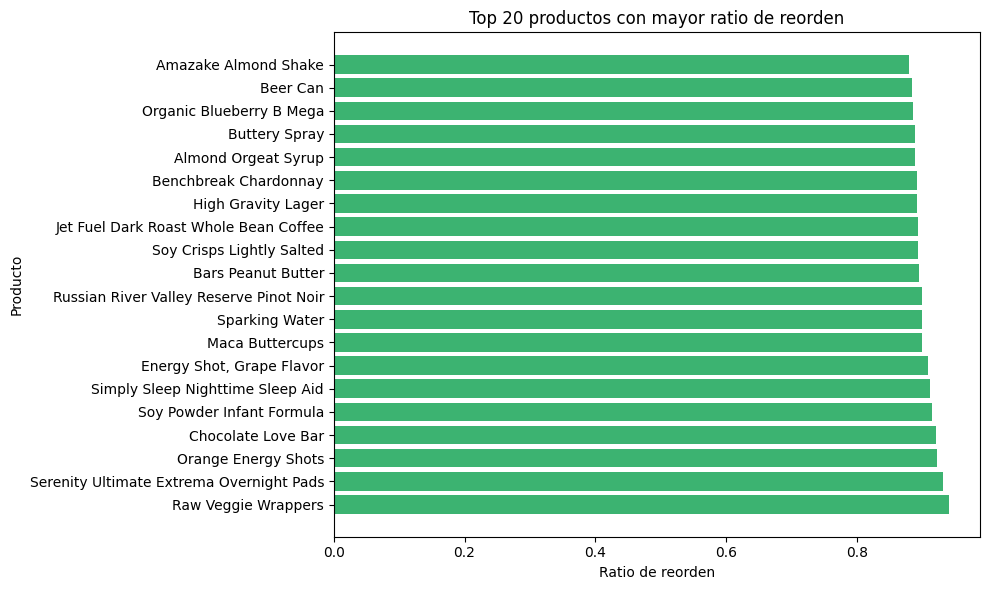

In [8]:
# Reorden ratio por producto
reorder_ratio = order_products_prior.groupby("product_id")["reordered"].mean().reset_index()
reorder_ratio = reorder_ratio.merge(products, on="product_id")
top_reordered = reorder_ratio.sort_values("reordered", ascending=False).head(20)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_reordered["product_name"], top_reordered["reordered"], color="mediumseagreen")
plt.title("Top 20 productos con mayor ratio de reorden")
plt.xlabel("Ratio de reorden")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()


PASO 4: Análisis de productos por departamento

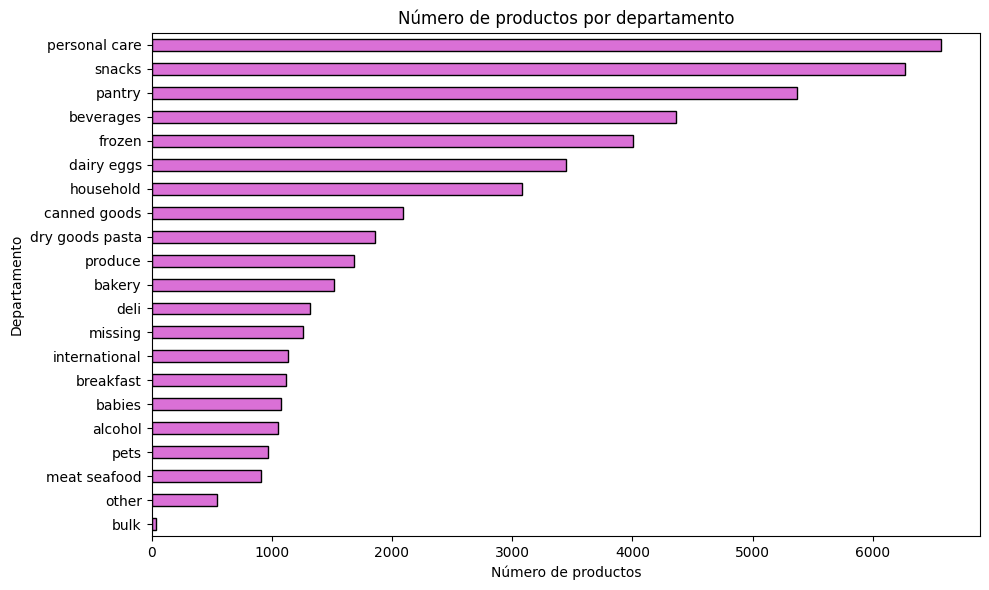

In [11]:
# Cargar datasets
departments = pd.read_csv("data/departments.csv")
products = pd.read_csv("data/products.csv")

# Unir productos con nombres de departamento
prod_dept = products.merge(departments, on="department_id", how="left")

# Contar productos por departamento
dept_counts = prod_dept["department"].value_counts()

# Gráfico
plt.figure(figsize=(10, 6))
dept_counts.sort_values().plot(kind="barh", color="orchid", edgecolor="black")
plt.title("Número de productos por departamento")
plt.xlabel("Número de productos")
plt.ylabel("Departamento")
plt.tight_layout()
plt.show()


Número de productos comprados por departamento (real, en pedidos)

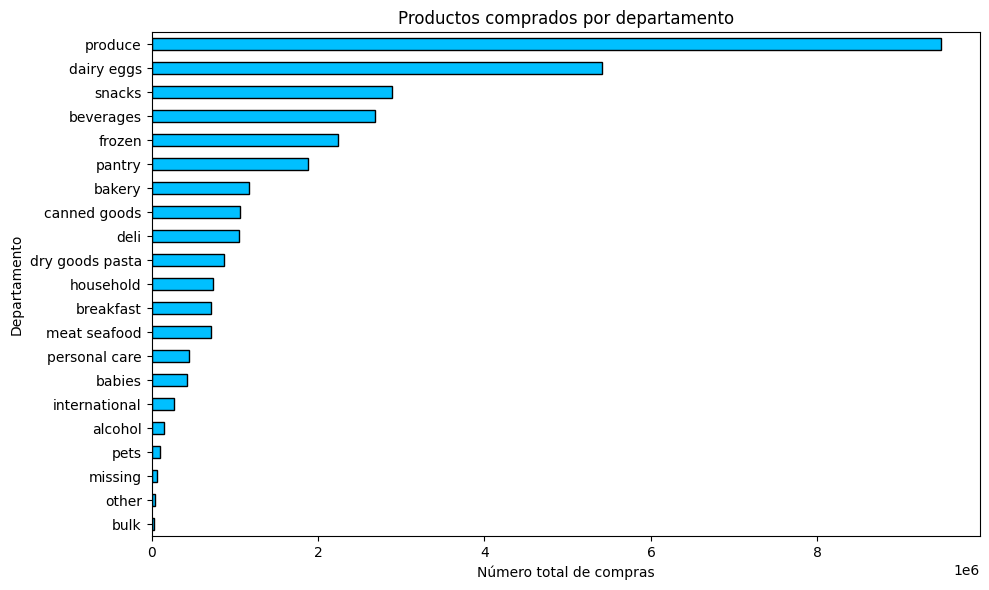

In [12]:
# Cargar datos necesarios
order_products_prior = pd.read_csv("data/order_products__prior.csv")
products = pd.read_csv("data/products.csv")
departments = pd.read_csv("data/departments.csv")

# Unir para obtener departamento
merged = order_products_prior.merge(products[["product_id", "department_id"]], on="product_id", how="left")
merged = merged.merge(departments, on="department_id", how="left")

# Contar productos comprados por departamento
dept_orders = merged["department"].value_counts()

# Gráfico
plt.figure(figsize=(10, 6))
dept_orders.sort_values().plot(kind="barh", color="deepskyblue", edgecolor="black")
plt.title("Productos comprados por departamento")
plt.xlabel("Número total de compras")
plt.ylabel("Departamento")
plt.tight_layout()
plt.show()
